# Week 1 - Images as signals

In general for the exercises:

- *Italics indicate text to explain the motivation or process behind a task*

- **Bold text indicates a task**

- Finally, \* (one star) and ** (two stars) indicates a difficult or a particuarly difficult task, respectively. These are especially optional!

## 1. Image representation


As mentioned, images come in many different flavors ranging from pictures of artwork to LIDAR topography maps. In general, an image can be represented as a $C \times N \times M$ matrix of pixel intensities:

$$
\mathbf{A} = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1M} \\
a_{21} & a_{22} & \cdots & a_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N1} & a_{N2} & \cdots & a_{NM}
\end{pmatrix}
$$

Here, the $P$ dimension is left out (since it is a hassle to write mathematically in Markdown), but imagine $P$ of these matrices "stacked" on top of one another:

Each of these matrices represents a "channel" in the image. Typically, in color images, there are 3 channels with each channel representing Red, Blue, and Green values respectively. Black and white images obviously only have one channel. Images with transparency have an extra "alpha channel" which holds binary values indicating whether or not that particular pixel is transparent. 

Later, particuarly with CNN's, we will see that individual image channels can hold different information about an image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
from math import ceil

## Loading images and such

For this course, we will use Pillow for loading and handling of images. Some courses on DTU (for example computer vision) use CV2, but due to the (purely empirical) prevalence of Pillow used in Machine Learning applications, we will use it whenever necessary.

Whenever it is *not* necessary to load images as... images, we will treat them purely as either numpy arrays or torch tensors

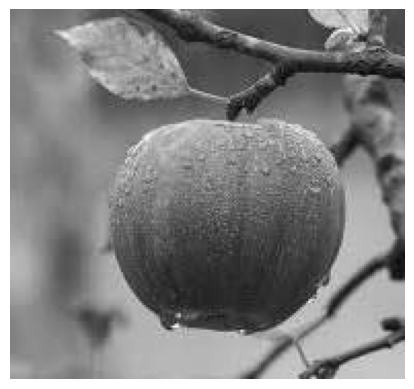

Image shape (height, width): (180, 192)


In [2]:
apple_image_path = os.path.join('images', 'image_gray.jpg')
image_gray = np.array(Image.open(apple_image_path).convert('L'))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()
print("Image shape (height, width):", image_gray.shape)

### Exercise 1.1

*As mentioned in the slides, we can also consider binary images where pixels are either "off" or "on". We determine whether a pixel is off or on based on the whether its original pixel value is smaller or larger than a given threshold*

**1. Complete the function below to create a binarized image of the above image given a specific threshold**

**2. Complete the second function below to grayscale a given RGB image**

**3. Is is possible to binarize RGB images? How could this work? Discuss**

*Test your implementations by using the code two cells below*

In [3]:
def binarize_with_thresholding(image, threshold, binary_values=[255, 0]):
    """
    Binarize an image based on a given threshold.


    Args:
        image (np.ndarray): np array representing a grayscaled image
        threshold (int): Value so that if a pixel is above this, it will be considered 'on' otherwise it will be 'off' 
        binary_values (list, optional): List where the first element is the actual value 'on' pixels will be set to, second is value for the 'off' elements [255, 0].

    Returns:
        binarized_image (np.ndarray): np array representing the image, now binarized 
    """

    binarized_image = np.where(image > threshold, binary_values[0], binary_values[1])
    
    return binarized_image

def rgb_to_grayscale(image):
    """
    Grayscale an RGB image

    Args:
        image (np.ndarray): np array representing the RGB image, must be of shape (n, m, c) 

    Returns:
        imag_grayscaled (np.ndarray): np array representing the now grayscaled image, should be of shape (n, m)
    """
    
    image_grayscaled = (image[:, :, 0] + image[:, :, 1] + image[:, :, 2])/3

    return image_grayscaled


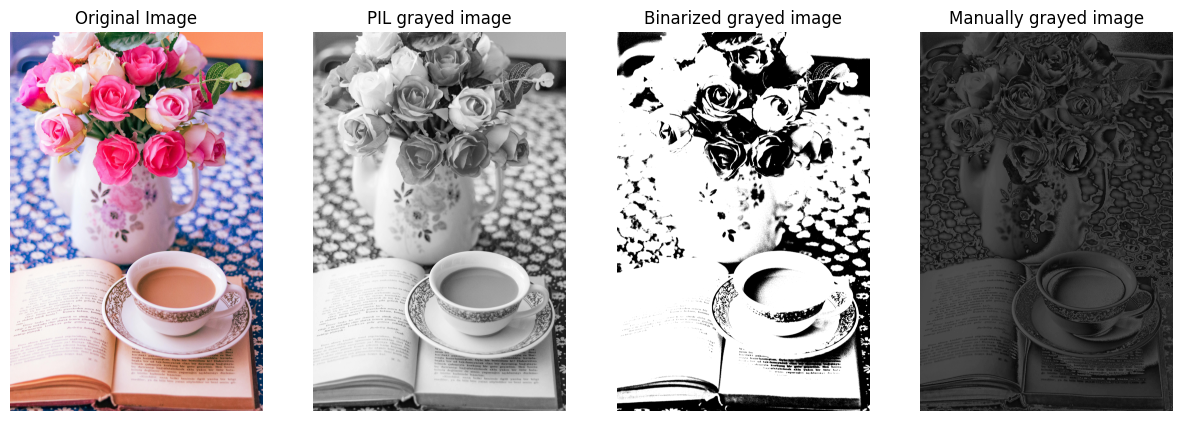

Original image shape (height, width, channels): (6000, 4000, 3)
PIL grayed image shape (height, width): (6000, 4000)
Manually grayed image shape (height, width): (6000, 4000)
Binarized image shape (height, width): (6000, 4000)


In [4]:
# Now plotting a few images using the function

original_image_path = os.path.join('images', 'img_1.jpg')

# Load as normal using PIL, this will get the RGB image
original_image = Image.open(original_image_path)

# Load and use PIL.Image.convert('L') to convert to grayscale
original_image_PIL_grayed = original_image.convert('L')

# Unlike say CV2 objects, PIL objects cannot be treated as numpy arrays. We convert them to numpy for easier plotting and handling
original_image = np.array(original_image)
original_image_PIL_grayed = np.array(original_image_PIL_grayed)

# print(original_image[:, :, 0])

# Create a figure and axis for each image
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(original_image, vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(original_image_PIL_grayed, cmap='gray', vmin=0, vmax=255) # cmap='gray' is used to display the image in grayscale
axs[1].set_title('PIL grayed image')
axs[1].axis('off')

# Get the manually binarized image
binarized_image = binarize_with_thresholding(original_image_PIL_grayed, threshold=int(255/2))

axs[2].imshow(binarized_image, cmap='gray', vmin=0, vmax=255) # Same as above, cmap gray
axs[2].set_title('Binarized grayed image')
axs[2].axis('off')

# Get the manually grayed image
image_manually_grayed = rgb_to_grayscale(original_image)

axs[3].imshow(image_manually_grayed, cmap='gray', vmin=0, vmax=255) # Same as above, cmap gray
axs[3].set_title('Manually grayed image')
axs[3].axis('off')

plt.show()

print("Original image shape (height, width, channels):", original_image.shape)
print("PIL grayed image shape (height, width):", original_image_PIL_grayed.shape)
print("Manually grayed image shape (height, width):", image_manually_grayed.shape)
print("Binarized image shape (height, width):", image_manually_grayed.shape)



You have to decide how to split the color channels when binarizing. What I have done is to take the average of the channels to then combine it into one channel. Additionally you can use a factor for each channel to choose which of the channels dominate.

### Exercise 1.2

*As mentioned in the lecture, a $28 \times 28$ binary image has $2^{784}$ different possible images*

**1. How many possible images do we have if we choose a non-binary $28 \times 28$ image, using 8-bit values to represent pixel intensities?**  
You would have $8^{28 \times 28} = 8^{784}$

**2. How many if we choose to use a continuous scale, simply the real numbers for representing pixel intensities instead?**  
Then $\mathbb{R}^{784}$

### Exercise 1.3
When faced with images that are too bright or too dark or have too high or low contrast, we can use histogram equalisation in order to scale the image. In this exercise you will implement a function that does exactly that. We will first artificially create images with pixels within a narrow range and some with increased contrast using the following functions:


In [5]:
def squash_image(image, target_range=(0, 255)):
    """
      Normalize the pixel values of an image to a specific range.


    Args:
        image (np.ndarray): np array representing the image
        target_range (tuple, optional): Tuple representing the target range (min, max). Defaults to (0, 255).

    Returns:
        normalized_image np.ndarray: np array with pixel values normalized to the target range
    """

    # Get the min and max values of the original image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Calculate the scale and shift to squash the values
    scale = (target_range[1] - target_range[0]) / (max_val - min_val)
    shift = target_range[0] - min_val * scale
    
    # Apply the scaling and shifting
    normalized_image = image * scale + shift
    
    # Clip values to ensure they are within the target range
    normalized_image = np.clip(normalized_image, target_range[0], target_range[1])
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    normalized_image = normalized_image.astype(np.uint8)
    
    return normalized_image


def set_contrast(image, contrast_factor):
    """
        Adjust the contrast of an image.


    Args:
        image (np.ndarray): np array representing the image
        contrast_factor (float): Float value where 1.0 means no change, less than 1.0 decreases contrast
          and greater than 1.0 increases contrast
        

    Returns:
        contrast_image: np array with adjusted contrast
    """

    # Calculate the mean pixel value
    mean = np.mean(image)
    
    # Adjust contrast
    contrast_image = (image - mean) * contrast_factor + mean
    
    # Clip values to ensure they are within the valid range
    contrast_image = np.clip(contrast_image, 0, 255)
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    contrast_image = contrast_image.astype(np.uint8)
    
    return contrast_image

In [6]:
# Now apply the functions:
image_gray = np.array(Image.open(apple_image_path).convert('L'))
dark_image = squash_image(image_gray, target_range=(0, 50))
bright_image = squash_image(image_gray, target_range=(200, 255))
low_contrast_image = set_contrast(image_gray, contrast_factor=0.5)
high_constrast_image = set_contrast(image_gray, contrast_factor=1.5)

**1. Using the following mathematical description of histogram equalisation, implement a function that does histogram equalisation on a grayscale image. Use numpy for the histogram and cdf calculations.**

Let $ I(x, y) $ represent the intensity of the pixel at position $ (x, y) $ in the original image.
The intensity values range from $ 0 $ to $ L-1 $, where $ L $ is the number of possible intensity levels (e.g., $ L = 256 $ for an 8-bit grayscale image).
The probability density function (PDF) of the intensity values is denoted as $ p_I(i) $, where $ i $ is an intensity value and $ p_I(i) $ is the probability that a randomly selected pixel has intensity $ i $.
The cumulative distribution function (CDF) of the intensity values is denoted as $ c_I(i) $.

 **Steps for Histogram Equalization**

1. **Calculate the PDF:**
   $$
   p_I(i) = \frac{\text{number of pixels with intensity } i}{\text{total number of pixels}}
   $$

2. **Calculate the CDF:**
   $$
   c_I(i) = \sum_{j=0}^{i} p_I(j)
   $$
   The CDF $ c_I(i) $ represents the cumulative sum of the PDF up to intensity $ i $.

3. **Transformation Function:**
   The new intensity value $ I_{\text{eq}}(x, y) $ for each pixel is obtained using the transformation function:
   $$
   I_{\text{eq}}(x, y) = (L-1) \cdot c_I(I(x, y))
   $$
   This equation maps the original intensity values to new values based on the CDF, effectively spreading the intensity values over the entire range.


**2. If an image has $X$ unique pixel values before histogram equalisation, how many will it have after?**



In [7]:
def histogram_equalisation(image):
    """
    Perform histogram equalization on a grayscale image.

    Parameters:
    image (numpy.ndarray): Input grayscale image.

    Returns:
    numpy.ndarray: Histogram-equalized image.
    """
    
    # Step 1: Calculate the histogram of the image
    hist, bins = np.histogram(image, bins=256, range=[0, 256])

    # Step 2: Calculate the cumulative distribution function (CDF)
    # pdf = []
    cdf = np.cumsum(hist)
    
    # Normalize the CDF to lie between 0 and 255
    cdf_normalized = (cdf - min(cdf)) / (max(cdf) - min(cdf)) * 255
    
    # Step 3: Use the CDF to map the original intensities to the equalized values
    image_equalized = cdf_normalized[image]
    
    return image_equalized

In [8]:
# Now we use the following plotting function to display the results for each of our 4 images:
def display_image_hist_and_cdf(image_gray, name=''):
    
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Display the equalized image
    ax[0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title(f'Histogram Equalized Image {name}')
    ax[0].axis('off')  # Hide axes
    
    # Plot the histogram
    hist, bins = np.histogram(image_gray.flatten(), 256, [0, 256])
    ax[1].bar(range(256), hist, color='gray', width=1)
    ax[1].set_title('Histogram')
    ax[1].set_xlim([0, 255])
    ax[1].set_xlabel('Pixel Intensity')
    ax[1].set_ylabel('Frequency')
    
    # Plot the CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    ax[2].plot(cdf_normalized, color='blue')
    ax[2].set_title('Cumulative Distribution Function (CDF)')
    ax[2].set_xlim([0, 255])
    # ax[2].set_ylim([0, 1])
    ax[2].set_xlabel('Pixel Intensity')
    ax[2].set_ylabel('Cumulative Probability')
    
    plt.tight_layout()
    plt.show()
    

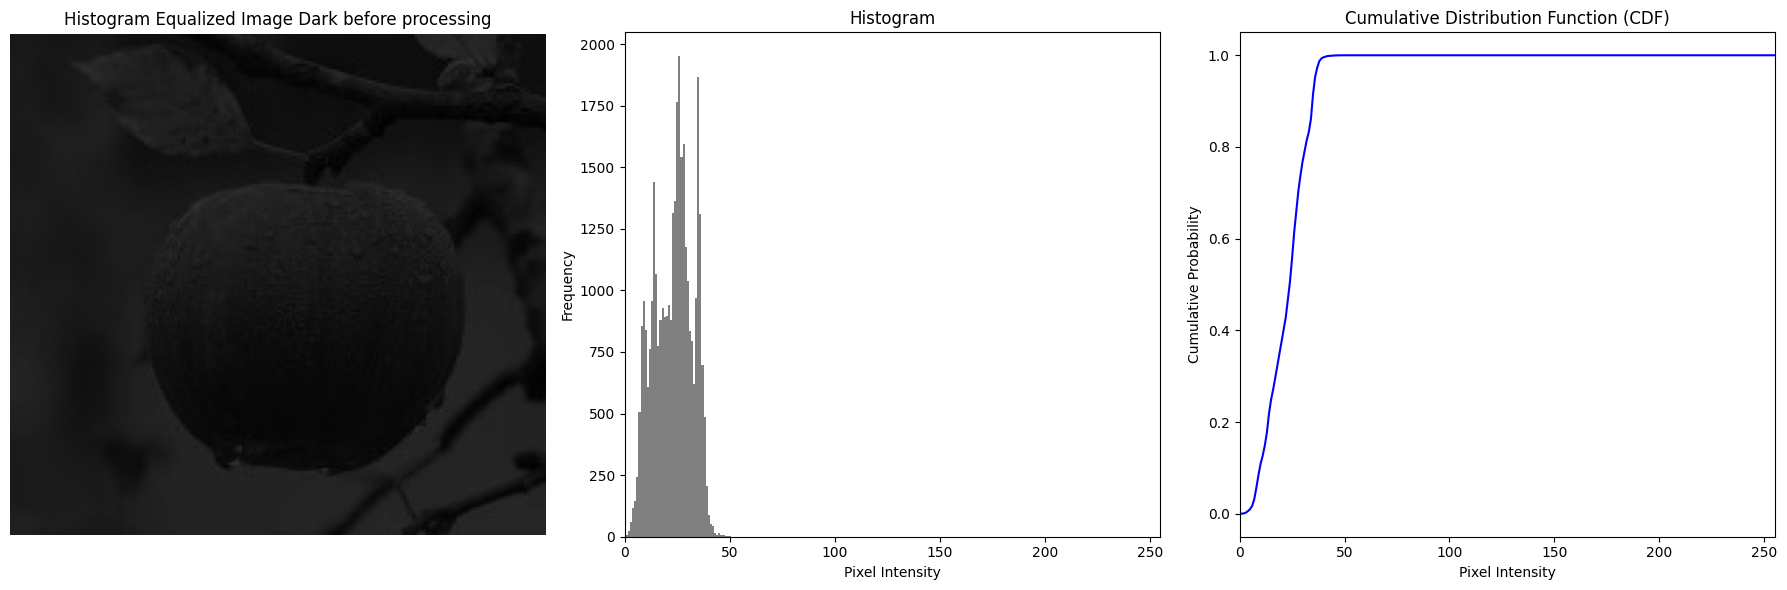

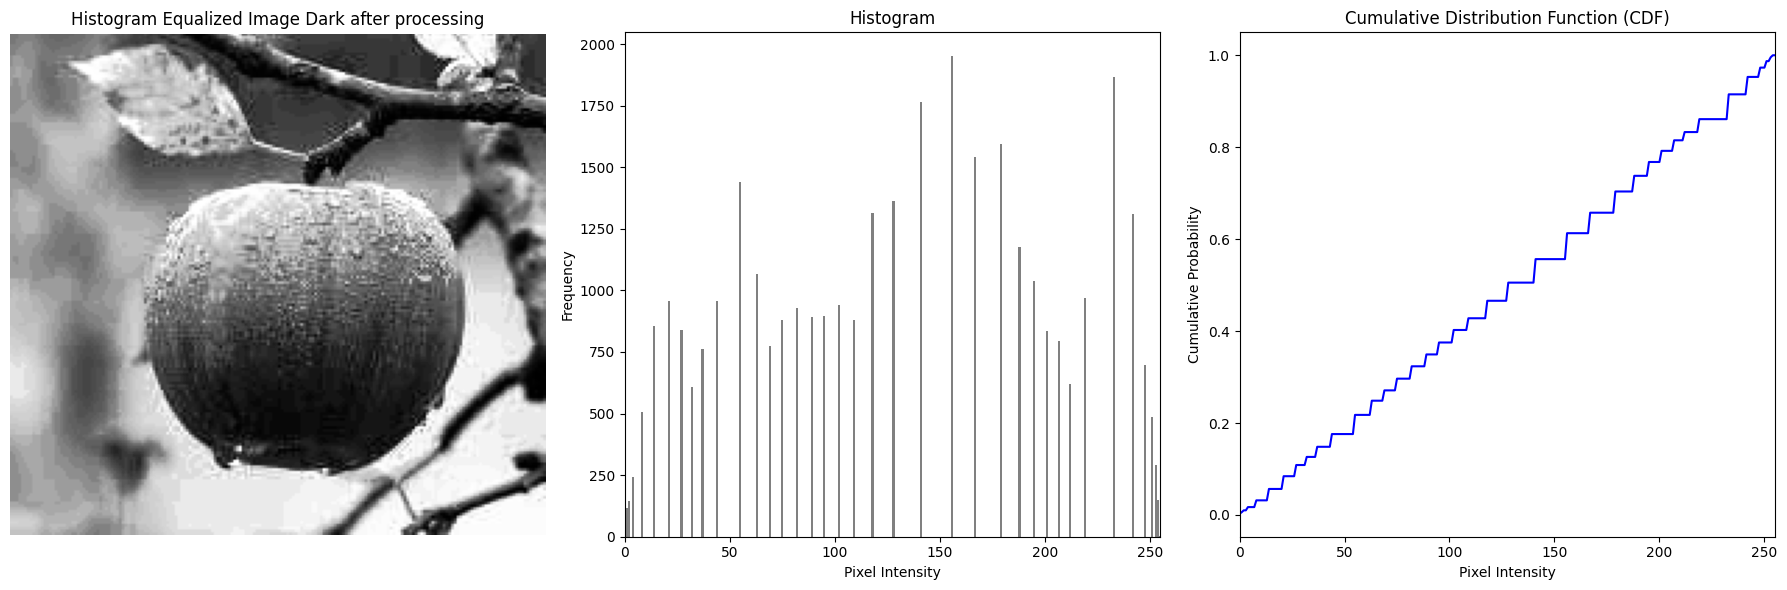

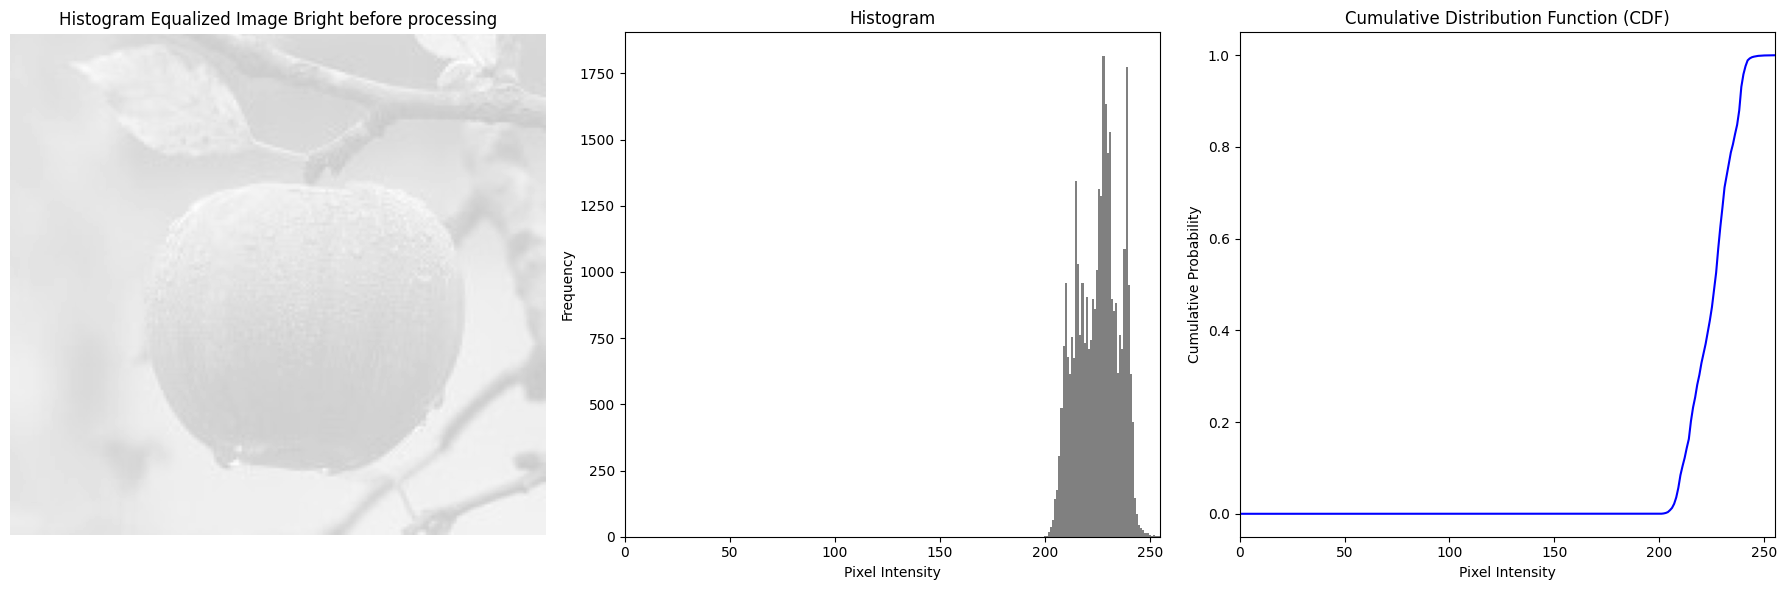

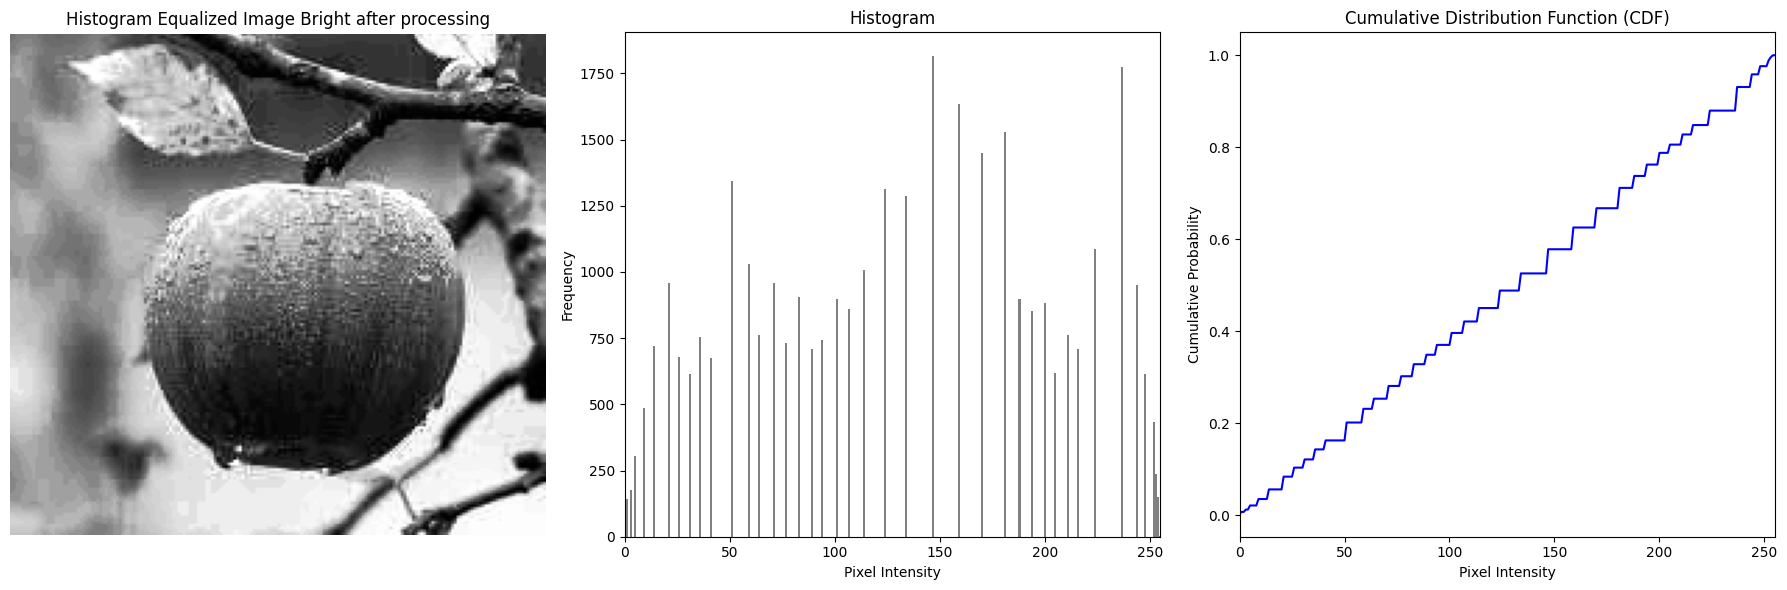

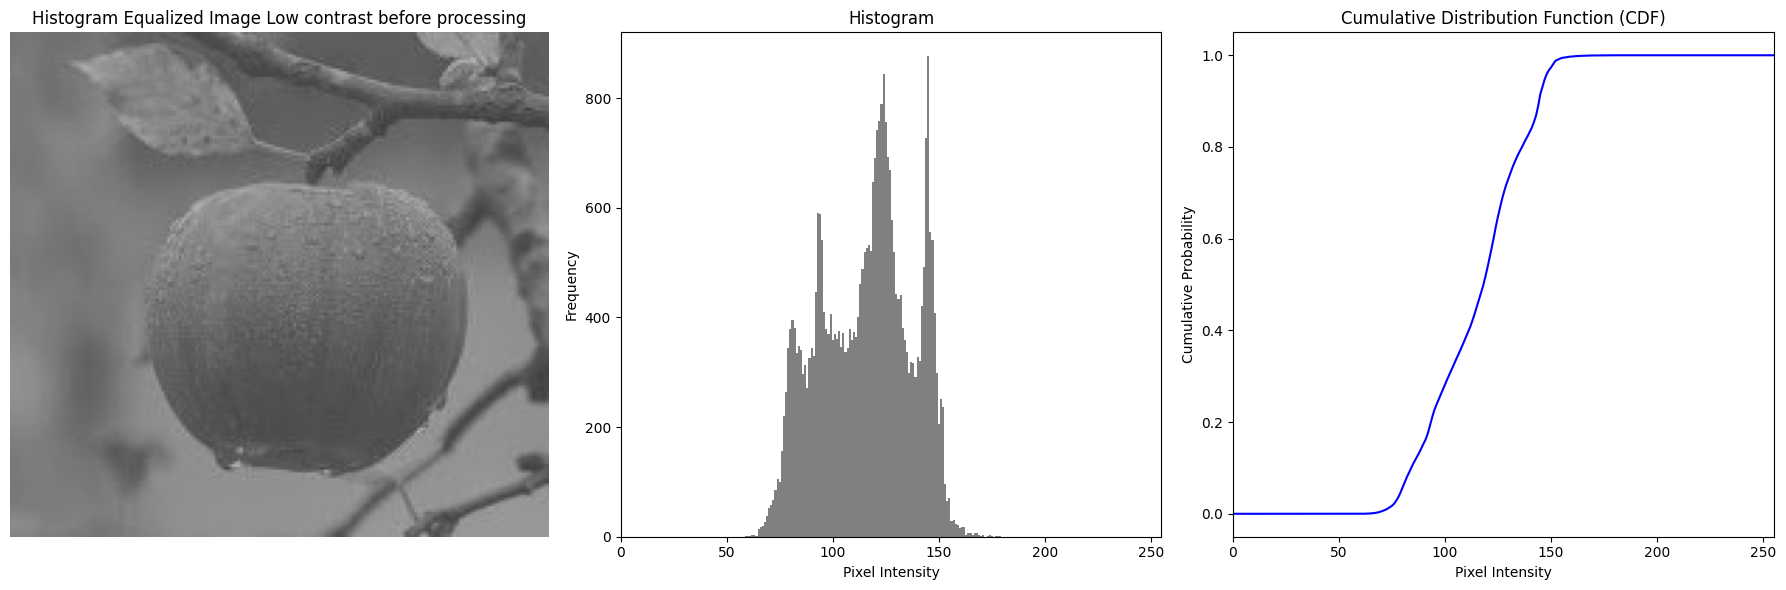

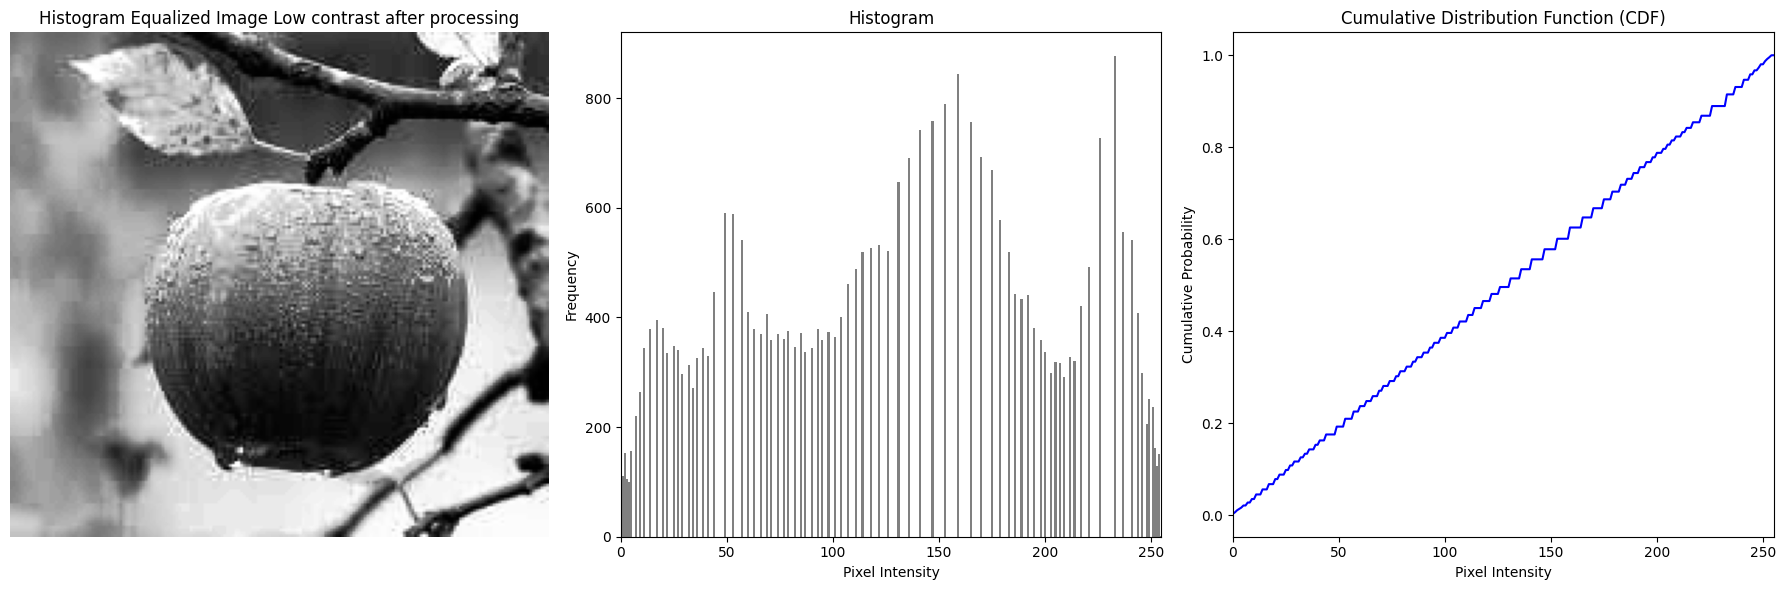

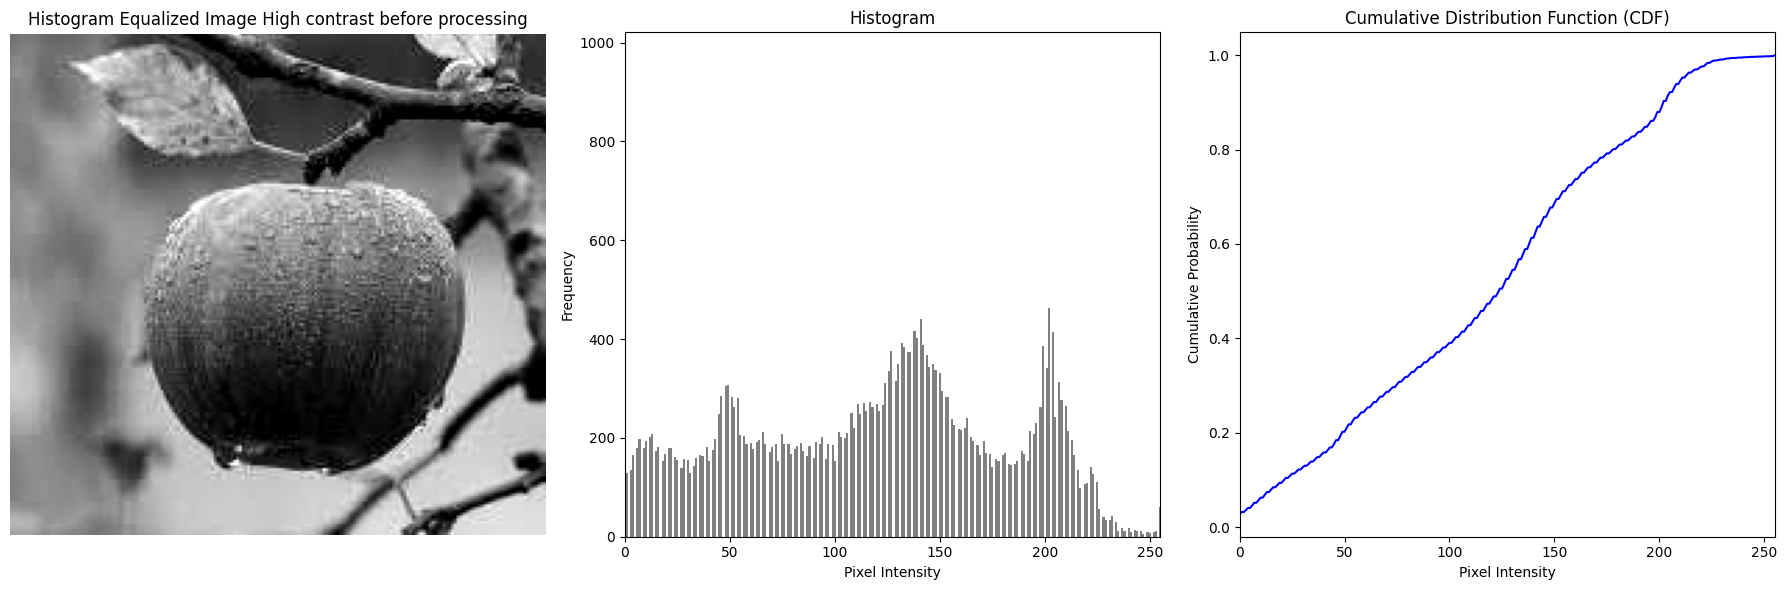

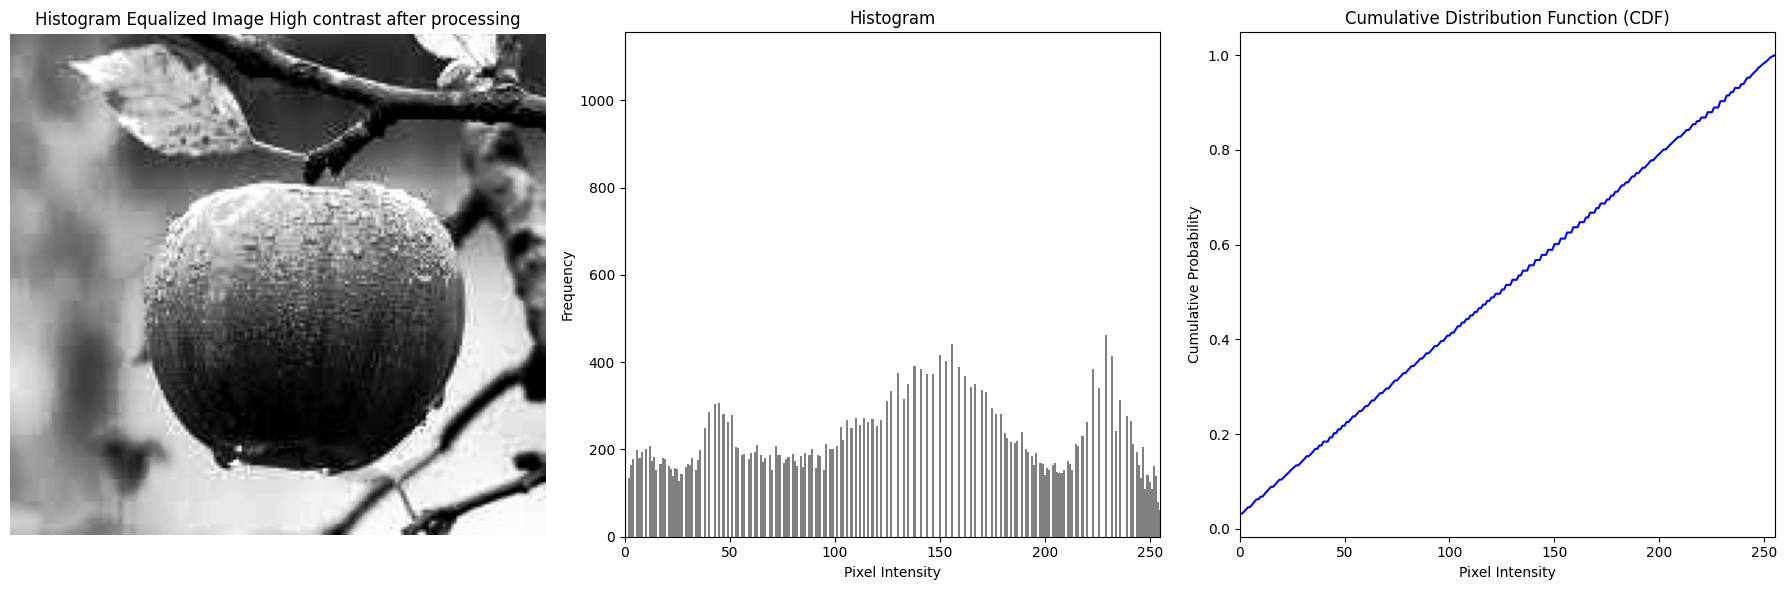

In [9]:
for img, name in zip((dark_image, bright_image, low_contrast_image, high_constrast_image),( 'Dark', 'Bright', 'Low contrast', 'High contrast')):
    display_image_hist_and_cdf(img, name = name+' before processing')
    img_equalised = histogram_equalisation(img)
    display_image_hist_and_cdf(img_equalised, name=name+' after processing')

## 2. Color Channels

*Typically placed as either the -1st (last) or the 0th (first) dimension of an image, the channels in an RGB image obviously hold Red-Blue-Green values. For all intents and purposes, these can just be seen as dimensions of a matrix, and subject to regular matrix operations*



### Exercise 2.1

*One should be cognisant of ones images being interpreted in the correct way by whatever package being used. PIL uses RGB by default, while CV2 uses BGR, for example.*

**1. Swap the channels of the above image to make it BGR instead of RGB (should swap blue for red and vice versa)**

*Test your implementation by showing the image two cells below*

In [10]:
# Load image and convert to numpy array, as normal
image_path = os.path.join('images', 'img_1.jpg')
rgb_image_path = os.path.join('images', 'img_1.jpg')
rgb_image = np.array(Image.open(rgb_image_path))

# Swap channels here
# Save copy
bgr_image = rgb_image.copy()

# Sequently swap channels by saving in memory
bgr_image[:, :, [2, 0]] = bgr_image[:, :, [0, 2]]

print("RGB image shape (height, width, channels):", np.array(rgb_image).shape)

RGB image shape (height, width, channels): (6000, 4000, 3)


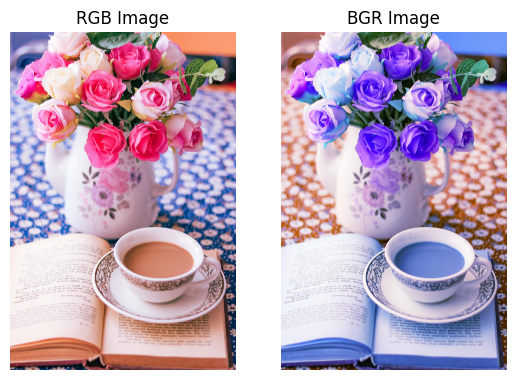

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].imshow(rgb_image, vmin=0, vmax=255)
axs[0].set_title('RGB Image')
axs[0].axis('off')
axs[1].imshow(bgr_image, vmin=0, vmax=255)
axs[1].set_title('BGR Image')
axs[1].axis('off')
plt.show()

### Exercise 2.2

*Looking at the relative frequency of different colors in an image can be useful way to collect summary statistics on the image in general*

**1. Examine the color histograms of the different images in the week1/images folder, or ones you find yourself, do they make sense? What do they tell you about the image itself?**



**2. Try modifying some of the colors by fixed amounts, either by multiplying with, or adding scalar values, how do the histograms change... What should you be congnisant of in these cases?**


**3. Normalize each histogram by total number of values of that color to get a "CDF" of pixel values**

**4. What is the potential value of normalizing by number of pixels vs not normalizing?**




[[[141 231 200]
  [138 228 197]
  [139 229 198]
  ...
  [255   2 117]
  [246 247 106]
  [244 245 104]]

 [[141 231 200]
  [137 227 196]
  [135 225 194]
  ...
  [254 255 114]
  [244 245 104]
  [247 248 107]]

 [[143 233 202]
  [137 227 196]
  [132 222 191]
  ...
  [249 250 109]
  [243 244 103]
  [251 252 111]]

 ...

 [[129 196 105]
  [106 173  82]
  [ 94 162  73]
  ...
  [158 227 135]
  [153 222 130]
  [150 219 127]]

 [[129 198 106]
  [112 182  90]
  [105 175  85]
  ...
  [159 228 136]
  [154 223 131]
  [157 226 134]]

 [[131 201 109]
  [130 200 108]
  [128 201 110]
  ...
  [153 222 130]
  [154 223 131]
  [166 235 143]]]


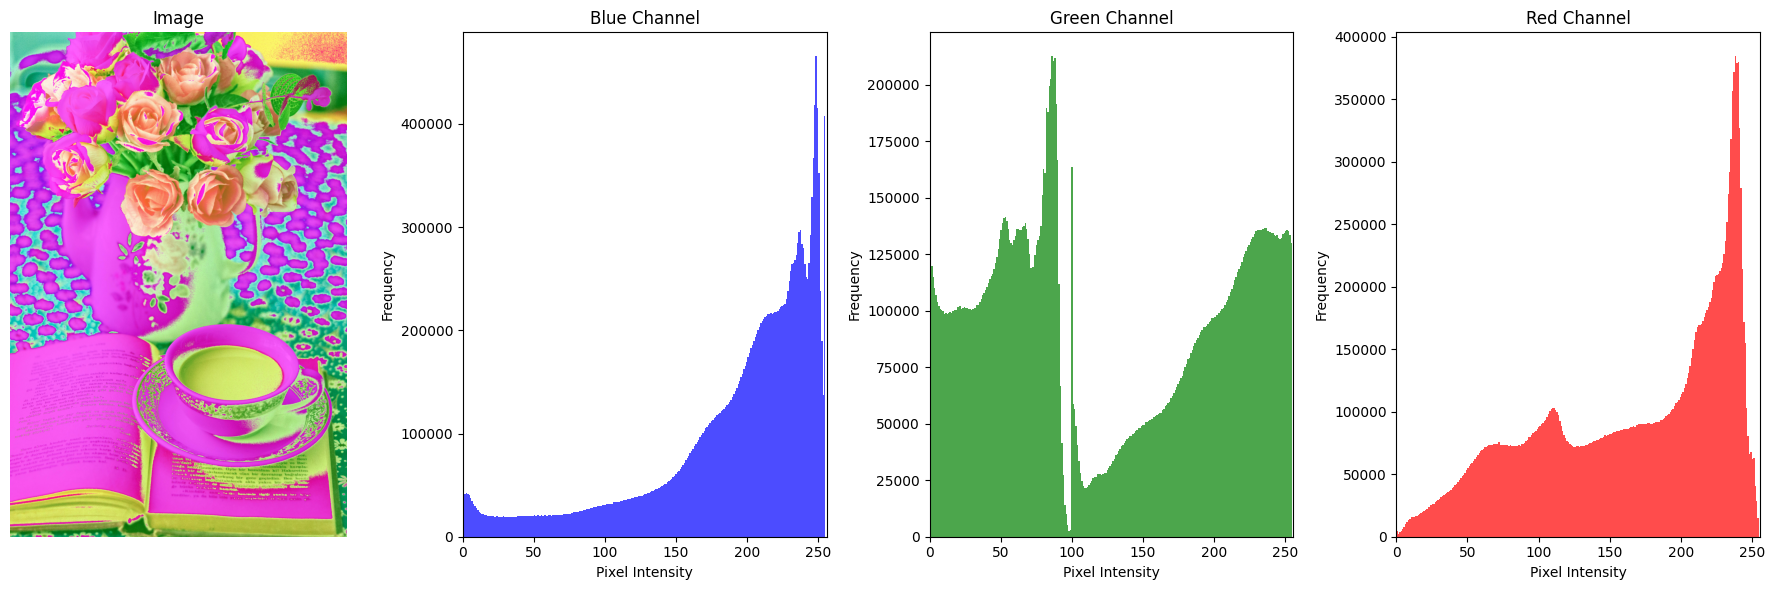

In [22]:
def show_color_distribution(image, density=False):
    """
    Display the distribution of pixels in each color channel (RGB) of an image.
    
    Parameters:
    - image: NumPy array representing the image.
    """
    # Split the image into its color channels
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    # Show the original image
    axs[0].set_title('Image')
    axs[0].imshow(image, vmin=0, vmax=255)
    axs[0].axis('off')
    
    # Plot the histogram of each of the color channels
    colors = ('b', 'g', 'r')
    channel_names = ('Blue', 'Green', 'Red')
    for i, (color, channel_name) in enumerate(zip(colors, channel_names)):
        axs[i + 1].hist(image[..., i].flatten(), bins=256, color=color, alpha=0.7, density=density)
        axs[i + 1].set_title(f'{channel_name} Channel')
        axs[i + 1].set_xlabel('Pixel Intensity')
        axs[i + 1].set_ylabel('Frequency')
        axs[i + 1].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()
rgb_image_copy = rgb_image.copy()
rgb_image_copy[:, :, 1] = np.clip(rgb_image_copy[:, :, 1] + 100, 0, 255)

show_color_distribution(rgb_image_copy)


## 3. Distance Metrics and simliarity measures

*Distance metrics (often "Incorrectly" called 'norms') can be considered as a ways of measuring simliarity between two datums. You should already have learned about (and used) the concept in 02450, but given their importance, they are recapped here (somewhat informally).*


*A distance metric is a pair of a **set $\mathcal{M}$** and a **function $d$** such that: $d: \mathcal{M} \times \mathcal{M} \rightarrow \mathbb{R}$*

*I.E a function that takes two elements from a set and spits out a real number that compares them*

*Apart from this, it must also satisfy the following conditions (also mentioned in slide w1 slide 39)*

- *Non-negativity*: $d(x,y) \geq 0 \quad \forall x \forall y$
  - *A distance can never be negative*
- *Indiscernibility of identities*: $d(x, y) = 0 \iff x  = y$
  -  *A distance is zero only if we compare an element with a copy of itself*
-  *Symmetry*: $d(x,y) = d(y,x) \quad \forall x \forall y$
   -  *A distance from a to b is the same as from b to a*
-  *Triangle inequality:* $d(x,z) \leq d(x, y) + d(y,z) \quad \forall x \forall y \forall z$
   -  *The distance from a to c is always the same as or shorter than from a to b to c*


*In this course, we work with the following norms:*

- *Minkowski (p-norm)*:
  - $d_p(x,y) = \left(\sum^n_{i=1} |x_i - y_i|^p \right)^{\frac{1}{p}} \quad \forall p | p \geq 1$

*And thats it... Manhattan (absolute)  and Euclidian are also included in this. Do note, that the Minkowski is only a true distance metric (and norm) for $p \geq 1$*


*As for similarity measures (for which the above requirements do not apply), we also use:*

- *Cosine similarity (a sort of angle between vectors)*
  - $d_{cos}(x,y) = \frac{\mathbf{x} \cdot \mathbf{y} } {||\mathbf{x}|| \space ||\mathbf{y}||}$
  - $ = \frac{\sum^n_{i=1} x_i y_i}{\sqrt{\sum^n_{i=1}x_i^2} \sqrt{\sum^n_{i=1} y^2_i}}$ 
    - $1$: Vectors point to same direction 
    - $0$: Vectors are orthogonal (90 degree angle to one another)
    - $-1$: Vectors point in opposite directions
- *Squared (euclidian) distance (not a distance metric)*
  - $d_{SE}(x,y) = \left(\sum^n_{i=1} (x_i - y_i)^2 \right)$
  - Often used for loss calculation (you may have seen that already)




- Write code for euclidian, manhattan and cosine distance measures
- Show that the cosine similarity and the p-norm are norms (have certain properties of norms)
- Perhaps something with using the different norms on the images that have been slightly perturbed 

### Exercise 3.1

*As mentioned, the squared distance somewhat unintuitively is not a true distance metric, same goes for the cosine distance*


**1. First, argue why the squared distance is *not* a distance metric (Hint: It does not satisfy the triangle inequality)**


**2. Next, argue for why the cosine distance is not a true distance metric**


<!-- **2. Now, argue mathematically for why the Euclidian distance is indeed a distance metric (I.E fulfills the above requirements for a distance metric)** -->

**3. As mentioned above, the Minkowski distance is only a true distance measure for $p \geq 1$, why is this?**




### Exercise 3.2

**1. Implement the Euclidian, manhattan, cosine, and minkowski distances below respectively, you may be tempted to use built-in numpy functions, do not**

**2. Verify your implementations with the plot_distance_heatmap function two cells below**

In [13]:
def euclidean_distance(vec1, vec2):
    dist_l2 = ...
    return dist_l2

def manhattan_distance(vec1, vec2):
    dist_l1 = ...
    return dist_l1

def cosine_distance(vec1, vec2, *args):
    "Please remember this is the cosine *distance*"

    dist_cos = ...

    return dist_cos

def minkowski_distance(vec1, vec2, p):

    dist_minkowski = ...

    return dist_minkowski


In [14]:
def plot_distance_heatmap(distance_metrics, x_range=(-20, 20), y_range=(-20, 20), resolution=200, names='', **kwargs):
    """
    Plots a heatmap of the given distance metric for 2D vectors over a specified range.

    Parameters:
    - distance_metric: A function that takes two 2D vectors and returns a scalar distance.
    - x_range: A tuple specifying the range of x values (min, max).
    - y_range: A tuple specifying the range of y values (min, max).
    - resolution: The number of points along each axis.
    """
    # Generate a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    ps = kwargs.get('ps', [None for el in distance_metrics])
    
    fig, axs = plt.subplots(nrows=ceil(len(distance_metrics) / 2), ncols=2, figsize=(8, 6))
    
    for idx, (name, metric, ax) in enumerate(zip(names, distance_metrics, axs.flatten())):
        # Compute the distance metric for each point in the grid
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                vector = np.array([X[i, j], Y[i, j]])
                Z[i, j] = metric(vector, np.array([1e-5, 1e-5]), ps[idx])
        # Plot the heatmap
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid("both")
        ax.set_title(f'{name}')
        cont = ax.contourf(X, Y, Z, cmap='viridis')
        fig.colorbar(cont, label='Distance', ax=ax)
    plt.tight_layout()
    plt.show()

TypeError: euclidean_distance() takes 2 positional arguments but 3 were given

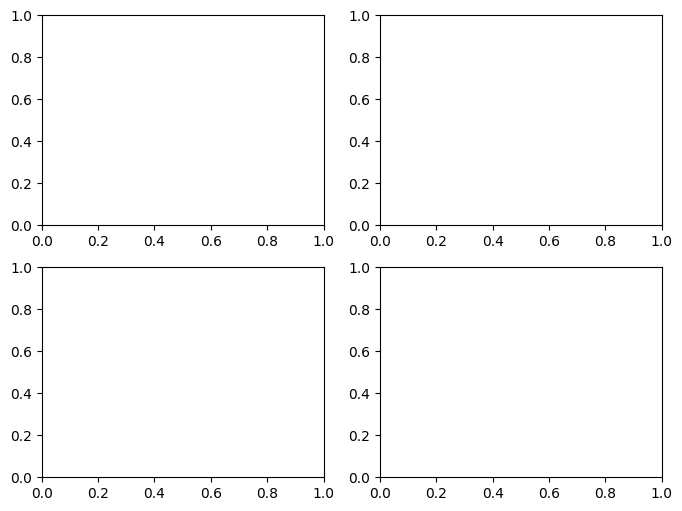

In [15]:
plot_distance_heatmap((euclidean_distance, manhattan_distance, cosine_distance), names=("Euclidean", "Manhattan", "Cosine",))

In [ ]:
plot_distance_heatmap((manhattan_distance, minkowski_distance, euclidean_distance, minkowski_distance), names=("Manhattan", "L1 norm", "Euclidean", 'L2 norm'), ps=[1, 1, 2, 2])

In [ ]:
ps = [1, 0.9, 0.75, 0.5]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)

### Exercise 3.3

**1. Find uses cases where it is most beneficial to use the Manhattan, Euclidian, and Cosine distance measure respectively**


****2. What happens with the minkowski distance as $p \rightarrow \infty$? If we use this to compare two distances with one another, what does it measure?**


****3. What happens withe the minkowski distance as $p \rightarrow 0$? If we use this to compare two distances with one another, what does it measure? (Assume this is real analysis, and that $0^0 = 0$**



## A final note on these distances

While it is generally true that the distance measures above are fundamental in machine learning, they are not exactly useful per say, for what we are working with now images. Simply using the euclidian distance, for example on a vectorized image, could give a ***huge*** distance if just one pixel is different.

Moreover, and perhaps more importantly, the distances above do not use any sort of spatial information. That is, where the different indices (pixels in an image) in one or the other vector, are in relation to one another, has no effect on the distance itself. To actually measure differences in images therefore, is a harder problem, one that we will in part learn to tackle next time when we use **Convolution**. 
